## **IMPORTS**

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
brazil = pd.read_csv(
    filepath_or_buffer="../data/timeSeriesBrazil_process.csv",
    dtype={
        "year":"int",
        "state":"category",
        "month":"category",
        "number":"float",
        "date":"string"
    }
)
brazil.drop(columns=['Unnamed: 0'], inplace=True)
brazil['date'] = pd.to_datetime(arg=brazil['date'], format="%m/%d/%Y")

## **FUNCTIONS**

In [43]:
def regplot(x, y, data):
    plt.figure(figsize=(14,5))
    fig, ax = plt.subplots()
    ax.plot(x, y, data=data, color='0.1')
    ax = sns.regplot(x=x, y=y, data=data, ci=None, scatter_kws=dict(color='0.85'))
    ax.set_title(f'Regression plot with {x} and {y}')

## **PRE-PROCESSING**

In [44]:
datas = []
for year in sorted(brazil.year.value_counts().index):
    datas.append(pd.DataFrame(brazil[(brazil['year'] == year)]))

brazil = pd.concat(objs=datas)
brazil

,year,state,month,number,date
3374,1998,Acre,Janeiro,0.000,1998-01-01
3394,1998,Acre,Fevereiro,0.000,1998-01-01
3414,1998,Acre,Março,0.000,1998-01-01
3434,1998,Acre,Abril,0.000,1998-01-01
3454,1998,Acre,Maio,0.000,1998-01-01
...,...,...,...,...,...
3329,2022,Tocantins,Agosto,2.298,2022-01-01
3340,2022,Tocantins,Setembro,2.753,2022-01-01
3351,2022,Tocantins,Outubro,2.327,2022-01-01
3362,2022,Tocantins,Novembro,185.000,2022-01-01


## **TREND ANALYSIS**

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

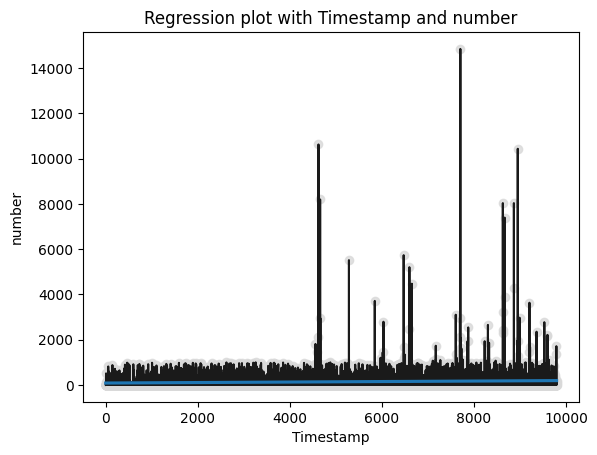

In [45]:
brazil['Timestamp'] = np.arange(len(brazil.index)) # Time-step feature

plt.figure(figsize=(14,5))
regplot(x="Timestamp", y="number", data=brazil)

## **DATA SPLIT**

In [46]:
brazil.shape

(9796, 6)

In [48]:
X = brazil.loc[:, ['Timestamp']]
y = brazil['number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=False)

## **MODEL FIT**

In [49]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## **MODEL VALIDATION**

In [50]:
print(f'f(x) = {regressor.coef_[0]}*x + {regressor.intercept_}')
print(f'Desvio Padrão: ± {mean_squared_error(y_true=y_test, y_pred=y_pred)}')
print(f'R quadrado: {r2_score(y_true=y_test, y_pred=y_pred)}')

f(x) = 0.011247078512241326*x + 81.95752103990091
Desvio Padrão: ± 305832.722728673
R quadrado: -0.0006522054433790725
